In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Loading the dataset

In [2]:
vc=pd.read_csv('vehicle_production_data.csv')

### Data Cleaning and Preprocessing 

In [3]:
# inspect missing value 
vc.isnull().sum()

Year                 0
Month                0
Brand                0
Model                0
Plant_Location       0
Units_Produced       0
Defects_Reported     0
Production_Hours     0
Export_Units         0
Local_Sales_Units    0
dtype: int64

#### there is no missing values

In [4]:
# review data types
vc.dtypes

Year                   int64
Month                  int64
Brand                 object
Model                 object
Plant_Location        object
Units_Produced         int64
Defects_Reported       int64
Production_Hours     float64
Export_Units           int64
Local_Sales_Units      int64
dtype: object

In [5]:
# remove duplicate entries
vc.drop_duplicates(inplace=True)

In [6]:
# summary statistics
vc.describe()

,Year,Month,Units_Produced,Defects_Reported,Production_Hours,Export_Units,Local_Sales_Units
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2018.906000,6.296000,2429.088000,4.984000,5185.190700,420.840000,2008.248000
std,2.612051,3.458947,1396.040447,2.313103,2780.990701,329.816537,1159.638944
min,2015.000000,1.000000,57.000000,0.000000,519.730000,8.000000,47.000000
25%,2017.000000,3.000000,1180.250000,3.000000,2815.592500,156.500000,1005.250000
50%,2019.000000,6.000000,2352.000000,5.000000,5218.045000,350.000000,1919.500000
75%,2021.000000,9.000000,3642.000000,6.000000,7602.657500,613.000000,2965.750000
max,2023.000000,12.000000,4998.000000,15.000000,9990.970000,1453.000000,4641.000000


In [7]:
# map month numbers to names
month_map={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
vc['Month']=vc['Month'].map(month_map)

#### the column Month has been converted 

In [8]:
# ensure 'year' is within valid range
vc[(vc['Year']>2015)&(vc['Year']<2023)]

,Year,Month,Brand,Model,Plant_Location,Units_Produced,Defects_Reported,Production_Hours,Export_Units,Local_Sales_Units
0,2021,December,Hyundai,MUV,Chennai,621,4,2543.98,170,451
1,2018,March,Tata Motors,Truck,Gurugram,3681,3,6460.95,712,2969
2,2022,December,Tata Motors,Hatchback,Chennai,1170,12,9274.82,161,1009
3,2019,June,Kia,EV,Sriperumbudur,291,2,9976.42,75,216
4,2021,July,Mahindra,Hatchback,Chennai,3947,3,808.29,684,3263
...,...,...,...,...,...,...,...,...,...,...
493,2018,December,Mahindra,Truck,Pune,3724,6,639.15,548,3176
495,2021,November,Maruti Suzuki,Hatchback,Pune,2647,5,9772.82,142,2505
497,2018,March,Toyota,MUV,Pune,2709,2,2477.01,196,2513
498,2018,April,Maruti Suzuki,Truck,Pune,4646,6,7660.34,530,4116


In [9]:
# correct negative values 
num_cols=['Units_Produced','Defects_Reported','Production_Hours']
for col in num_cols:
    vc[col]=vc[col].apply(lambda x:abs(x))

In [10]:
# add defect rate as percentage
vc['Defect_Rate']=vc['Defects_Reported']/vc['Units_Produced']*100
vc.head()

,Year,Month,Brand,Model,Plant_Location,Units_Produced,Defects_Reported,Production_Hours,Export_Units,Local_Sales_Units,Defect_Rate
0,2021,December,Hyundai,MUV,Chennai,621,4,2543.98,170,451,0.644122
1,2018,March,Tata Motors,Truck,Gurugram,3681,3,6460.95,712,2969,0.081500
2,2022,December,Tata Motors,Hatchback,Chennai,1170,12,9274.82,161,1009,1.025641
3,2019,June,Kia,EV,Sriperumbudur,291,2,9976.42,75,216,0.687285
4,2021,July,Mahindra,Hatchback,Chennai,3947,3,808.29,684,3263,0.076007


In [11]:
# standardise text formatting for plant locations
vc['Plant_Location']=vc['Plant_Location'].str.title().str.strip()

In [12]:
# Verify production total
vc['Units_Check']=vc['Export_Units']+vc['Local_Sales_Units']
incorrect_rows=vc[vc['Units_Check']!=vc['Units_Produced']]
print("incorrect rows=",incorrect_rows)

incorrect rows= Empty DataFrame
Columns: [Year, Month, Brand, Model, Plant_Location, Units_Produced, Defects_Reported, Production_Hours, Export_Units, Local_Sales_Units, Defect_Rate, Units_Check]
Index: []


In [13]:
# assign unit price to each model type
unit_prices={'MUV':9,'Truck':15,'Hatchback':4,'EV':12,'Sedan':6,'SUV':10}
vc['Unit_Price_Lakhs']=vc['Model'].map(unit_prices)
vc['Total_Sales_Value']=(vc['Units_Produced']*vc['Unit_Price_Lakhs'])
vc.head()

,Year,Month,Brand,Model,Plant_Location,Units_Produced,Defects_Reported,Production_Hours,Export_Units,Local_Sales_Units,Defect_Rate,Units_Check,Unit_Price_Lakhs,Total_Sales_Value
0,2021,December,Hyundai,MUV,Chennai,621,4,2543.98,170,451,0.644122,621,9,5589
1,2018,March,Tata Motors,Truck,Gurugram,3681,3,6460.95,712,2969,0.081500,3681,15,55215
2,2022,December,Tata Motors,Hatchback,Chennai,1170,12,9274.82,161,1009,1.025641,1170,4,4680
3,2019,June,Kia,EV,Sriperumbudur,291,2,9976.42,75,216,0.687285,291,12,3492
4,2021,July,Mahindra,Hatchback,Chennai,3947,3,808.29,684,3263,0.076007,3947,4,15788


In [14]:
# Top 5 highest production units
units_array=vc['Units_Produced'].to_numpy()
print(np.sort(units_array)[-5:])

[4990 4991 4993 4998 4998]


In [15]:
# Convert Production Hours to days
vc['Production_Days']=vc['Production_Hours']/8
vc.head()

,Year,Month,Brand,Model,Plant_Location,Units_Produced,Defects_Reported,Production_Hours,Export_Units,Local_Sales_Units,Defect_Rate,Units_Check,Unit_Price_Lakhs,Total_Sales_Value,Production_Days
0,2021,December,Hyundai,MUV,Chennai,621,4,2543.98,170,451,0.644122,621,9,5589,317.99750
1,2018,March,Tata Motors,Truck,Gurugram,3681,3,6460.95,712,2969,0.081500,3681,15,55215,807.61875
2,2022,December,Tata Motors,Hatchback,Chennai,1170,12,9274.82,161,1009,1.025641,1170,4,4680,1159.35250
3,2019,June,Kia,EV,Sriperumbudur,291,2,9976.42,75,216,0.687285,291,12,3492,1247.05250
4,2021,July,Mahindra,Hatchback,Chennai,3947,3,808.29,684,3263,0.076007,3947,4,15788,101.03625


In [16]:
# column which shows'Domestic' or 'Export' based on sales units
vc['Sales_Category']=np.where(vc['Export_Units']>vc['Local_Sales_Units'],'Export','Domestic')
vc.head()

,Year,Month,Brand,Model,Plant_Location,Units_Produced,Defects_Reported,Production_Hours,Export_Units,Local_Sales_Units,Defect_Rate,Units_Check,Unit_Price_Lakhs,Total_Sales_Value,Production_Days,Sales_Category
0,2021,December,Hyundai,MUV,Chennai,621,4,2543.98,170,451,0.644122,621,9,5589,317.99750,Domestic
1,2018,March,Tata Motors,Truck,Gurugram,3681,3,6460.95,712,2969,0.081500,3681,15,55215,807.61875,Domestic
2,2022,December,Tata Motors,Hatchback,Chennai,1170,12,9274.82,161,1009,1.025641,1170,4,4680,1159.35250,Domestic
3,2019,June,Kia,EV,Sriperumbudur,291,2,9976.42,75,216,0.687285,291,12,3492,1247.05250,Domestic
4,2021,July,Mahindra,Hatchback,Chennai,3947,3,808.29,684,3263,0.076007,3947,4,15788,101.03625,Domestic


In [17]:
# Add a 'Quarter' column for analysis
quarter={'January':1,'February':1,'March':1,'April':2,'May':2,'June':2,'July':3,'August':3,'September':3,'October':4,'November':4,'December':4}
vc['Quarter']=vc['Month'].map(quarter)
vc.head()

,Year,Month,Brand,Model,Plant_Location,Units_Produced,Defects_Reported,Production_Hours,Export_Units,Local_Sales_Units,Defect_Rate,Units_Check,Unit_Price_Lakhs,Total_Sales_Value,Production_Days,Sales_Category,Quarter
0,2021,December,Hyundai,MUV,Chennai,621,4,2543.98,170,451,0.644122,621,9,5589,317.99750,Domestic,4
1,2018,March,Tata Motors,Truck,Gurugram,3681,3,6460.95,712,2969,0.081500,3681,15,55215,807.61875,Domestic,1
2,2022,December,Tata Motors,Hatchback,Chennai,1170,12,9274.82,161,1009,1.025641,1170,4,4680,1159.35250,Domestic,4
3,2019,June,Kia,EV,Sriperumbudur,291,2,9976.42,75,216,0.687285,291,12,3492,1247.05250,Domestic,2
4,2021,July,Mahindra,Hatchback,Chennai,3947,3,808.29,684,3263,0.076007,3947,4,15788,101.03625,Domestic,3


In [18]:
# Yearly summary of production and defects 
yearly_summary=vc.groupby('Year').agg({'Units_Produced':'sum','Defects_Reported':'sum'})
print(yearly_summary)

      Units_Produced  Defects_Reported
Year                                  
2015          169507               329
2016           98598               222
2017          162000               314
2018          142333               285
2019          125854               265
2020          111642               220
2021          152301               314
2022          123631               279
2023          128678               264


###  Data Analysis and Visualisation

In [19]:
# total vehicle produced
vc['Units_Produced'].sum()

np.int64(1214544)

In [20]:
# Brand with highest production
vc.groupby('Brand')['Units_Produced'].sum().idxmax()

'Maruti Suzuki'

In [40]:
# top brand by month
vc.groupby('Month')['Brand'].value_counts().unstack()

Brand,Honda,Hyundai,Kia,Mahindra,Maruti Suzuki,Tata Motors,Toyota
Month,,,,,,,
April,5,4,2,2,10,6,8
August,8,10,6,4,9,4,3
December,7,6,5,7,8,4,3
February,6,9,6,1,4,9,3
January,7,6,8,7,8,8,6
July,4,4,4,8,2,4,5
June,4,6,10,6,6,8,10
March,11,6,6,2,7,6,9
May,5,8,5,9,8,7,7


In [36]:
vc['Brand'].value_counts()

Brand
Hyundai          78
Honda            76
Maruti Suzuki    76
Tata Motors      74
Kia              69
Toyota           69
Mahindra         58
Name: count, dtype: int64

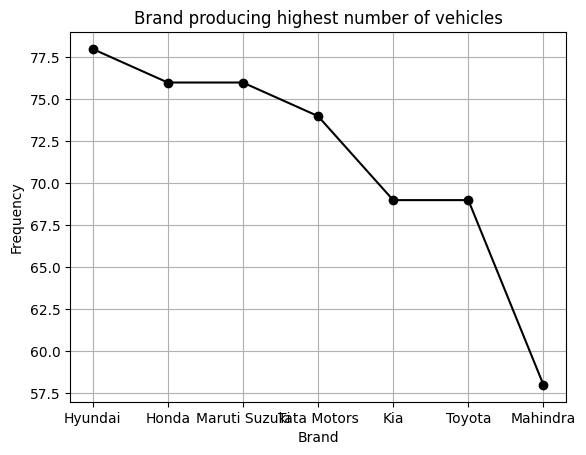

In [22]:
# Which Brand produced the highest number of vehicles?
vc['Brand'].value_counts().plot(kind='line',title='Brand producing highest number of vehicles',color='black',marker='o')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [23]:
# Plant_Location which had the lowest average Defect_Rate
vc.groupby('Plant_Location')['Defect_Rate'].mean().idxmin()

'Sanand'

In [24]:
# Find the year with the highest Export_Units
vc.groupby('Year')['Export_Units'].sum().idxmax()

np.int64(2015)

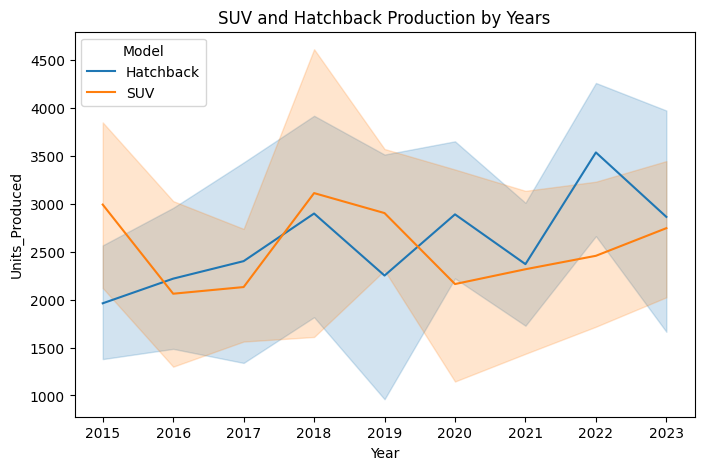

In [25]:
# Compare SUV and Hatchback production over the years
SUV_Hatchback=vc[vc['Model'].isin(['SUV','Hatchback'])]
plt.figure(figsize=(8,5))
sns.lineplot(x='Year',y='Units_Produced',hue='Model',data=SUV_Hatchback)
plt.title('SUV and Hatchback Production by Years')
plt.show()

In [26]:
# EVs (Electric Vehicles) production percentage?
percentage_of_EV=vc[vc['Model'] == 'EV']['Units_Produced'].sum() / vc['Units_Produced'].sum()* 100
print("percentage of EV={:.2f}%".format(percentage_of_EV))

percentage of EV=16.92%


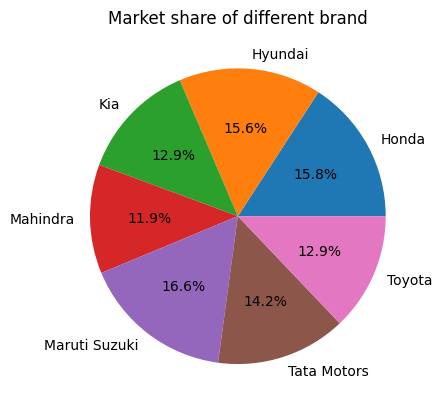

In [27]:
# show the market share of different brands
vc.groupby('Brand')['Units_Produced'].sum().plot(kind='pie',autopct='%1.1f%%',title='Market share of different brand')
plt.ylabel(' ')
plt.show()

In [28]:
# Which model type has the highest defect rate?
vc.groupby('Brand')['Defect_Rate'].idxmax()

Brand
Honda            204
Hyundai          284
Kia              465
Mahindra         444
Maruti Suzuki    233
Tata Motors      377
Toyota            96
Name: Defect_Rate, dtype: int64

In [29]:
# Find the plant with the most efficient production
vc['Efficiency'] = vc['Units_Produced'] / vc['Production_Hours']
vc.groupby('Plant_Location')['Efficiency'].mean().sort_values(ascending=False)

Plant_Location
Sanand           0.948512
Pune             0.778066
Sriperumbudur    0.749498
Chennai          0.741846
Gurugram         0.734459
Name: Efficiency, dtype: float64

In [30]:
data = vc.pivot_table(index='Year', columns='Month', values='Units_Produced', aggfunc='sum')
print(data)

Month    April   August  December  February  January     July     June  \
Year                                                                     
2015    4230.0   2436.0   12937.0   19265.0  19636.0  10974.0  21203.0   
2016    3012.0   5309.0   12607.0    3339.0   1579.0   8984.0  15131.0   
2017    7946.0  21156.0   14005.0   11877.0  24404.0   7301.0  22139.0   
2018   18435.0  10269.0    6806.0    8651.0  14054.0  18864.0   8879.0   
2019   20440.0  15018.0    2631.0   15558.0   9560.0  10977.0  10062.0   
2020   18276.0  13832.0   13990.0    8146.0   5405.0   7249.0   8440.0   
2021    5795.0  12504.0   14911.0    4669.0  16848.0   7756.0  16676.0   
2022    6879.0  21936.0    8798.0   17448.0  14871.0   4777.0   7172.0   
2023    5313.0   5499.0   14293.0   16744.0  14763.0      NaN  15303.0   

Month    March      May  November  October  September  
Year                                                   
2015    9948.0  21165.0   12135.0  15828.0    19750.0  
2016    4626.0  1

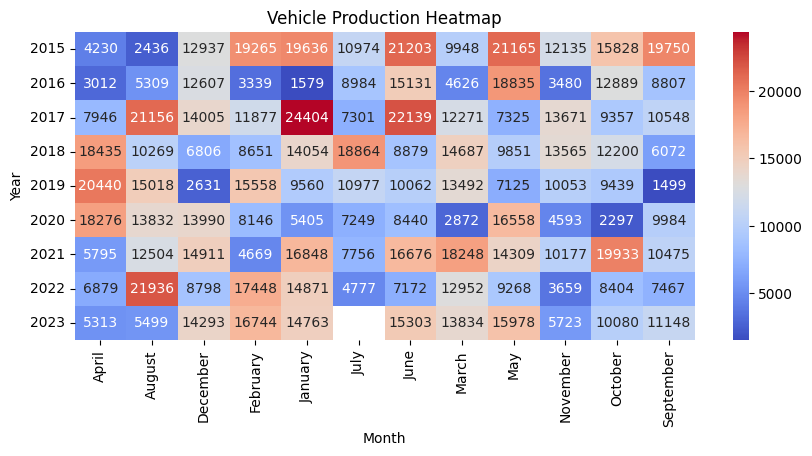

In [31]:
# heatmap of vehicle production by Year and Month
data = vc.pivot_table(index='Year', columns='Month', values='Units_Produced', aggfunc='sum')
plt.figure(figsize=(10,4))
sns.heatmap(data, cmap='coolwarm', annot=True, fmt='.0f')
plt.title('Vehicle Production Heatmap')
plt.show()

In [32]:
vc.groupby('Year')[['Export_Units', 'Local_Sales_Units']].sum()

,Export_Units,Local_Sales_Units
Year,,
2015,28985,140522
2016,18190,80408
2017,27326,134674
2018,26631,115702
2019,21984,103870
2020,18455,93187
2021,27321,124980
2022,18325,105306
2023,23203,105475


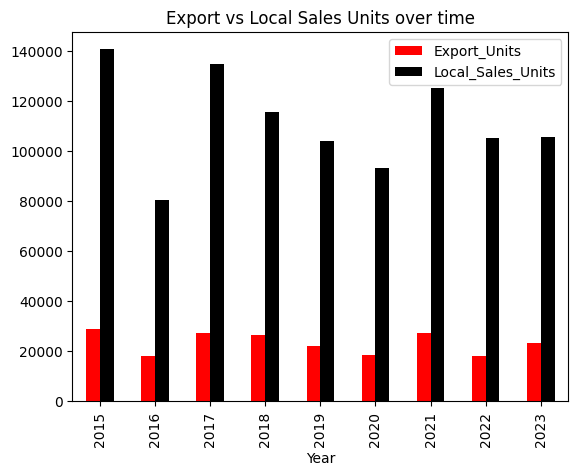

In [33]:
# Compare Export_Units vs Local_Sales_Units over time
vc.groupby('Year')[['Export_Units', 'Local_Sales_Units']].sum().plot(kind='bar',title='Export vs Local Sales Units over time',color=['red','black'])
plt.show()

In [34]:
# Analyze which brands are shifting more towards EV production
vc[(vc['Model'] == 'EV')].groupby('Brand')['Units_Produced'].sum()

Brand
Honda            34563
Hyundai          57369
Kia              25263
Mahindra          9131
Maruti Suzuki    32134
Tata Motors      25327
Toyota           21665
Name: Units_Produced, dtype: int64

In [54]:
vc.groupby(['Year','Brand'])['Units_Produced'].sum().unstack()

Brand,Honda,Hyundai,Kia,Mahindra,Maruti Suzuki,Tata Motors,Toyota
Year,,,,,,,
2015,18682,26626,22657,8500,39800,28689,24553
2016,12657,17089,10498,17334,15969,11494,13557
2017,35263,22075,19251,19067,24264,27742,14338
2018,20285,12657,15482,24575,24429,9379,35526
2019,15643,25525,25772,10380,18358,11903,18273
2020,10053,9471,12950,11667,32676,13695,21130
2021,27507,36850,13921,29629,14336,18387,11671
2022,35720,17283,13563,8375,9635,24976,14079
2023,16447,21799,23002,15180,21981,26738,3531


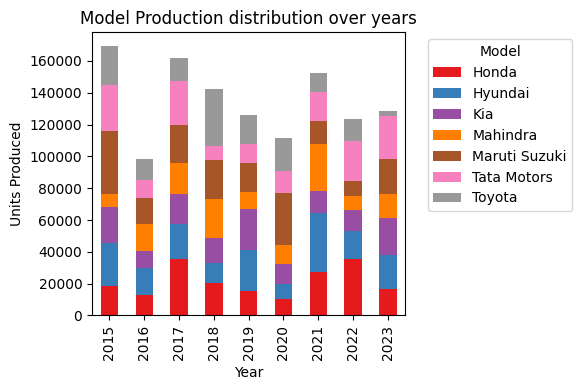

In [50]:
# Model production distribution
vc.groupby(['Year','Brand'])['Units_Produced'].sum().unstack().plot(kind='bar',stacked=True,figsize=(6,4),colormap='Set1')
plt.title('Model Production distribution over years')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Units Produced')
plt.tight_layout()
plt.show()

### Data Interpretation 

In [35]:
# Final Summary
print("\nDataset Summary")
print("Number of Years present:", vc['Year'].nunique())
print("Total Units Produced:", vc['Units_Produced'].sum())
print("Average Defect Rate: {:.2f}%".format(vc['Defect_Rate'].mean()))
print("Top Plant:", vc.groupby('Plant_Location')['Units_Produced'].sum().idxmax())
print("Most Popular Model:", vc.groupby('Model')['Units_Produced'].sum().idxmax())
print("Key Recommendation: Focus on improving efficiency in plants with high defect rates and invest in EV production growth.")


Dataset Summary
Number of Years present: 9
Total Units Produced: 1214544
Average Defect Rate: 0.44%
Top Plant: Sanand
Most Popular Model: EV
Key Recommendation: Focus on improving efficiency in plants with high defect rates and invest in EV production growth.
